# Preamble

Assignment for week 1: [Which p-values can you expect?](https://d3c33hcgiwev3.cloudfront.net/_122e44c5c658d76af09f193f785664d6_1.1-Which-p-values-can-you-expect.pdf?Expires=1596153600&Signature=UoCvO-pFNMP1xOgPryP0y9dSZeVuL-ie89yLqGpwyJ4Oq6EB6Vg2Bs~yPW5EJ3jh7fHq5o4L6jyJDSgsm1~E-eHQZ5T0Ss70KZzYtoP5pBj8FlQgWWwJovH4WhkED6dsfOpxreYU0JigMs0154PrkWfXlPh0V45BbSHoKQePvfc_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A): 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy.stats import t, ttest_1samp
import matplotlib.pyplot as plt

## Definitions

In [3]:
def two_tailed_t_test(samples: np.ndarray, H0: float):
    """
    Calculate a two-tailed t-test on the samples
    null hypothesis: samples_mean = H0
    
    Returns
    -------
    t_value (distribution t(df=N-1))
    p_value (2-tailed t-test)
    """
    empirical_mean = np.mean(samples, axis=0)
    number_samples = samples.shape[0]
    standard_error = np.std(samples, ddof=1, axis=0) / np.sqrt(number_samples)
    t_value = (empirical_mean - H0) / standard_error
    p_value = 2.0 * (1.0 - t(df=number_samples-1).cdf(np.abs(t_value)))
    return t_value, p_value

In [4]:
def simulate(sample_mean: float, sample_std: float, sample_size: int, number_simulations: int):
    return (sample_mean + sample_std * np.random.randn(sample_size * number_simulations))\
    .reshape((sample_size, number_simulations))

## Validation

In [5]:
samples = simulate(106, 15, 26, 2)
samples

array([[116.95829267, 104.99069652],
       [107.92100267, 108.79831293],
       [ 73.97739493, 120.95520432],
       [ 91.19051054,  76.34625926],
       [121.48996095, 145.61635327],
       [107.29442609, 105.67104225],
       [122.19976102, 124.3544876 ],
       [137.91908886,  85.27183043],
       [107.28892276, 102.26031786],
       [121.8377587 , 102.55337924],
       [126.20821377, 140.86952903],
       [118.13398198, 117.46470275],
       [ 85.64198074, 135.32734511],
       [101.18717128,  83.53834584],
       [117.73676771, 124.0194857 ],
       [119.73329344, 114.52418099],
       [ 83.266709  , 107.93656261],
       [118.32554755, 115.60124465],
       [128.49096221, 139.13838026],
       [102.56419407,  95.99405426],
       [112.90002828, 118.00626061],
       [110.15650253,  97.14960527],
       [106.76589526, 111.10351881],
       [122.32680636, 110.20903021],
       [134.92609811,  99.39505681],
       [104.91048579, 129.74288519]])

In [6]:
two_tailed_t_test(samples, 100.)

(array([3.81259218, 3.52778928]), array([0.00080045, 0.00164654]))

In [7]:
ttest_1samp(samples, 100.)

Ttest_1sampResult(statistic=array([3.81259218, 3.52778928]), pvalue=array([0.00080045, 0.00164654]))

# Question 1

With n=26, we obtain a power of 50.4%


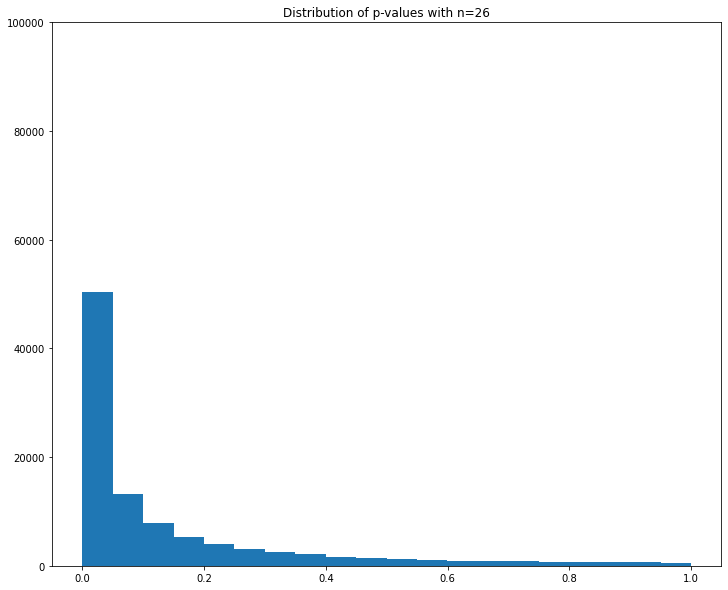

In [8]:
# Parameters:
sample_mean = 106 # mean IQ of our sample
sample_std = 15 # std deviation within our sample
sample_size = 26 # samples size
number_simulations = 100000
H0 = 100.

# Generate samples
samples = simulate(sample_mean, sample_std, sample_size, number_simulations)

# Calculate the p-values for each sample
t_values, p_values = two_tailed_t_test(samples, H0)

# Plot the results
fig, ax = plt.subplots(1,1,figsize=(12,10))
distr,_,_ = ax.hist(p_values, bins=20)
ax.set_ylim(0, number_simulations)
ax.set_title(f'Distribution of p-values with n={sample_size}')

# Calculate the power from these results
power = distr[0] / number_simulations
print(f"With n={sample_size}, we obtain a power of {100*power:.1f}%")

# Question 2

With n=51, we obtain a power of 80.0%


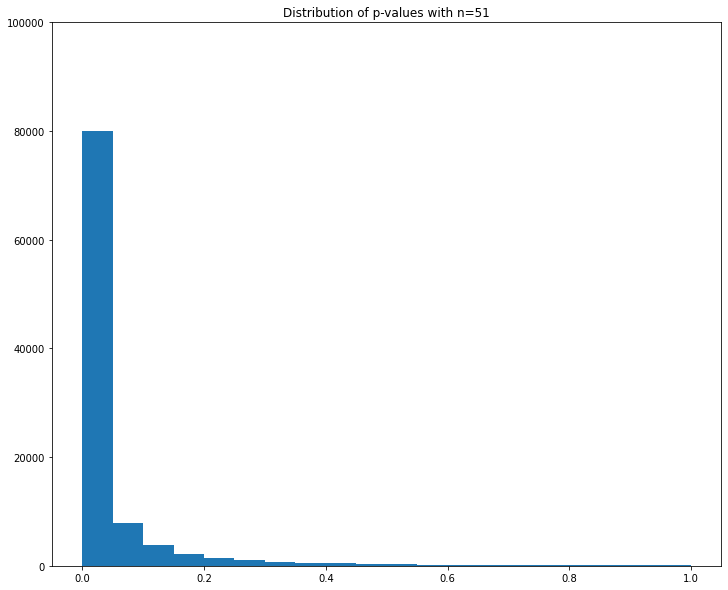

In [9]:
# Parameters:
sample_size = 51 # samples size

# Generate samples
samples = simulate(sample_mean, sample_std, sample_size, number_simulations)

# Calculate the p-values for each sample
t_values, p_values = two_tailed_t_test(samples, H0)

# Plot the results
fig, ax = plt.subplots(1,1,figsize=(12,10))
distr,_,_ = ax.hist(p_values, bins=20)
ax.set_ylim(0, number_simulations)
ax.set_title(f'Distribution of p-values with n={sample_size}')

# Calculate the power from these results
power = distr[0] / number_simulations
print(f"With n={sample_size}, we obtain a power of {100*power:.1f}%")

# Question 3

Much steeper with a larger sample size

# Question 4

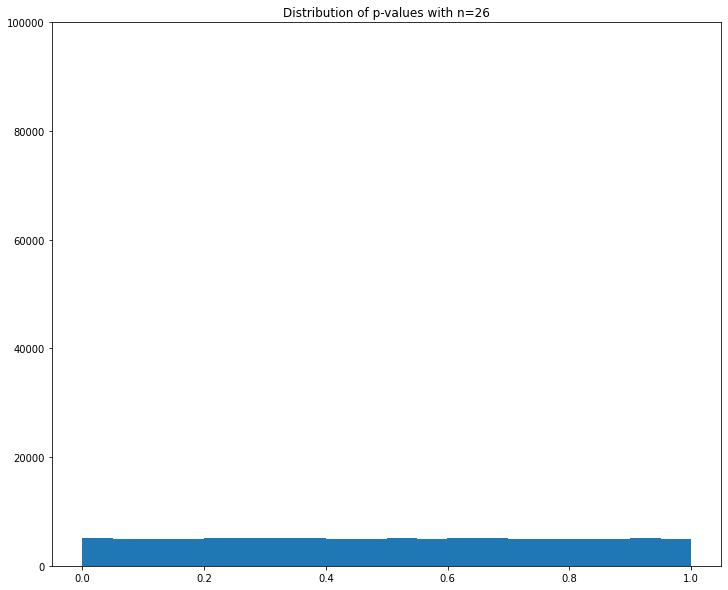

In [10]:
# Parameters:
sample_mean = H0 # mean IQ of our sample
sample_size = 26 # samples size

# Generate samples
samples = simulate(sample_mean, sample_std, sample_size, number_simulations)

# Calculate the p-values for each sample
t_values, p_values = two_tailed_t_test(samples, H0)

# Plot the results
fig, ax = plt.subplots(1,1,figsize=(12,10))
distr,_,_ = ax.hist(p_values, bins=20)
ax.set_ylim(0, number_simulations)
ax.set_title(f'Distribution of p-values with n={sample_size}');

When there is no true effect, the p-value is uniformly distributed

# Question 5

With no true effect, the type-1 error is 4.9%


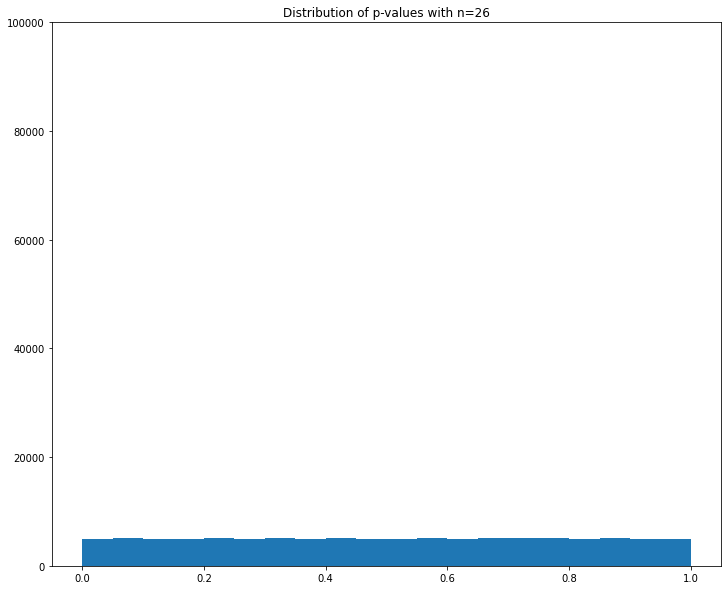

In [11]:
# Parameters:

# Generate samples
samples = simulate(sample_mean, sample_std, sample_size, number_simulations)

# Calculate the p-values for each sample
t_values, p_values = two_tailed_t_test(samples, H0)

# Plot the results
fig, ax = plt.subplots(1,1,figsize=(12,10))
distr,_,_ = ax.hist(p_values, bins=20)
ax.set_ylim(0, number_simulations)
ax.set_title(f'Distribution of p-values with n={sample_size}');

# When there is no true effect, the left-most bar is the probability that we wrongly reject the null, i.e., 
# probability of a False Positive (or type-1 error)
power = distr[0] / number_simulations
print(f"With no true effect, the type-1 error is {100*power:.1f}%")

# Question 6

With n=51, we obtain a power of 90.5% at the 5% significance level
With n=51, we obtain a power of 74.0% at the 1% significance level


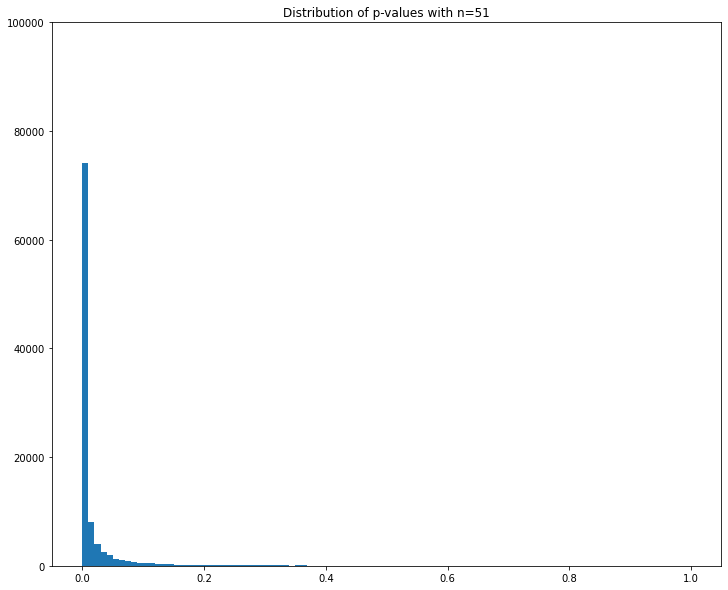

In [12]:
# Parameters:
sample_mean = 107 # mean IQ of our sample
sample_std = 15 # std deviation within our sample
sample_size = 51 # samples size
number_simulations = 100000
H0 = 100.

# Generate samples
samples = simulate(sample_mean, sample_std, sample_size, number_simulations)

# Calculate the p-values for each sample
t_values, p_values = two_tailed_t_test(samples, H0)

# Plot the results
fig, ax = plt.subplots(1,1,figsize=(12,10))
distr,_,_ = ax.hist(p_values, bins=100)
ax.set_ylim(0, number_simulations)
ax.set_title(f'Distribution of p-values with n={sample_size}')

# Calculate the power from these results
power5 = np.sum(distr[:5]) / number_simulations
print(f"With n={sample_size}, we obtain a power of {100*power5:.1f}% at the 5% significance level")
power1 = np.sum(distr[0]) / number_simulations
print(f"With n={sample_size}, we obtain a power of {100*power1:.1f}% at the 1% significance level")

# Question 7

# Question 8

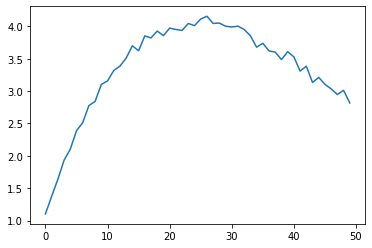

In [13]:
# Parameters:
sample_mean = 106 # mean IQ of our sample
sample_std = 15 # std deviation within our sample
number_simulations = 100000
H0 = 100.

samples_sizes = np.linspace(2, 51, 50, dtype=int)
p_values_45 = []
for sample_size in samples_sizes:
    # Generate samples
    samples = simulate(sample_mean, sample_std, sample_size, number_simulations)
    # Calculate the p-values for each sample
    t_values, p_values = two_tailed_t_test(samples, H0)
    # Count percentage of p-value in the interval [0.04, 0.05]
    pct = ((p_values >= 0.04) & (p_values < 0.05)).sum() / number_simulations * 100
    p_values_45.append(pct)

# Plot results
plt.plot(p_values_45)

# Power vs effect size

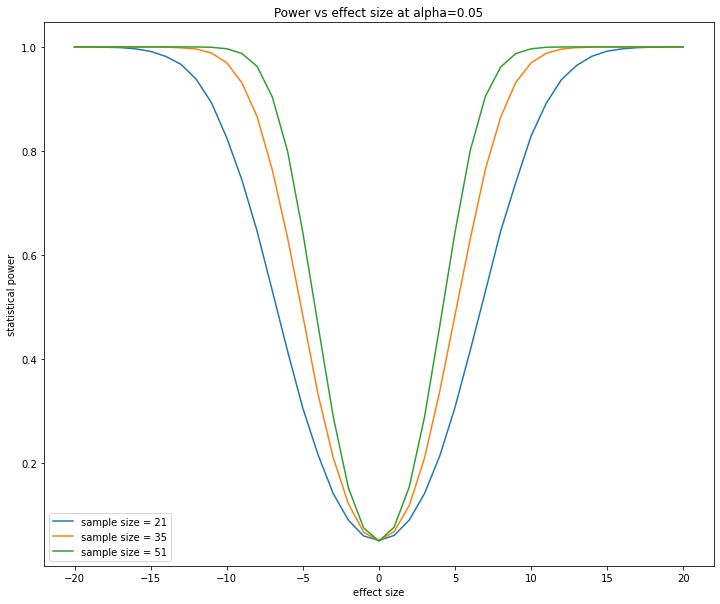

In [14]:
# Parameters:
sample_std = 15 # std deviation within our sample
number_simulations = 100000
H0 = 100.
alpha_level = 0.05

effect_sizes = np.linspace(-20, 20, 41)
fig, ax = plt.subplots(1,1,figsize=(12,10))

for sample_size in [21, 35, 51]:
    powers = []
    for effect_size in effect_sizes:
        # Generate samples
        sample_mean = H0 + effect_size
        samples = simulate(sample_mean, sample_std, sample_size, number_simulations)
        # Calculate the p-values for each sample
        t_values, p_values = two_tailed_t_test(samples, H0)
        # Calculate the power
        power = (p_values <= alpha_level).sum() / number_simulations
        powers.append(power)

    # Plot the results
    ax.plot(effect_sizes, powers, label=f'sample size = {sample_size}')
ax.set_ylabel('statistical power')
ax.set_xlabel('effect size')
ax.set_title(f'Power vs effect size at alpha={alpha_level}');
plt.legend();

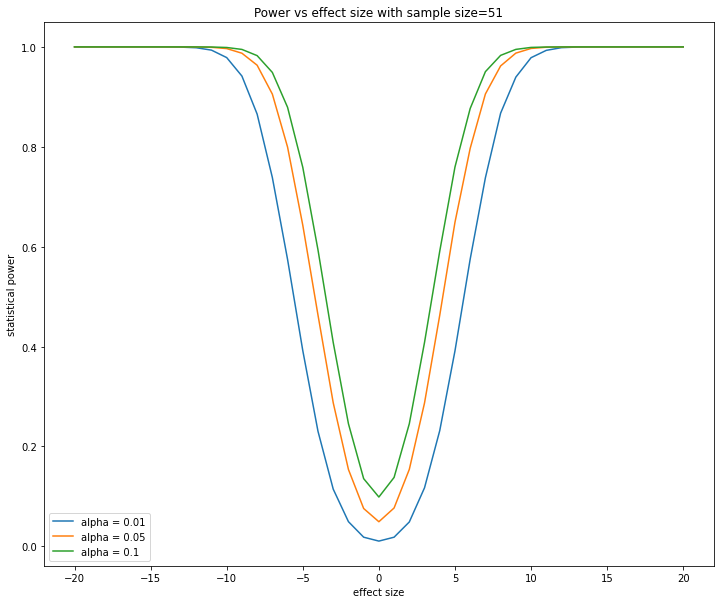

In [15]:
# Parameters:
sample_std = 15 # std deviation within our sample
sample_size = 51
number_simulations = 100000
H0 = 100.

effect_sizes = np.linspace(-20, 20, 41)
fig, ax = plt.subplots(1,1,figsize=(12,10))

for alpha_level in [0.01, 0.05, 0.1]:
    powers = []
    for effect_size in effect_sizes:
        # Generate samples
        sample_mean = H0 + effect_size
        samples = simulate(sample_mean, sample_std, sample_size, number_simulations)
        # Calculate the p-values for each sample
        t_values, p_values = two_tailed_t_test(samples, H0)
        # Calculate the power
        power = (p_values <= alpha_level).sum() / number_simulations
        powers.append(power)

    # Plot the results
    ax.plot(effect_sizes, powers, label=f'alpha = {alpha_level}')
ax.set_ylabel('statistical power')
ax.set_xlabel('effect size')
ax.set_title(f'Power vs effect size with sample size={sample_size}');
plt.legend();